# NYC T&LC Data

## Size
The size of the data is summarized in the following table, with a grand total shown in the lower right (1.2 billion):

Year|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec|Total Result
-|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:|-:
2009|1.41E+7|1.34E+7|1.44E+7|1.43E+7|1.48E+7|1.42E+7|1.36E+7|1.37E+7|1.40E+7|1.56E+7|1.43E+7|1.46E+7|1.71E+8
2010|1.49E+7|1.11E+7|1.29E+7|1.51E+7|1.55E+7|1.48E+7|1.47E+7|1.25E+7|1.55E+7|1.42E+7|1.39E+7|1.38E+7|1.69E+8
2011|1.35E+7|1.42E+7|1.61E+7|1.47E+7|1.56E+7|1.51E+7|1.47E+7|1.33E+7|1.46E+7|1.57E+7|1.45E+7|1.49E+7|1.77E+8
2012|1.50E+7|1.50E+7|1.61E+7|1.55E+7|1.56E+7|1.51E+7|1.44E+7|1.44E+7|1.45E+7|1.45E+7|5.16E+6|1.47E+7|1.70E+8
2013|1.48E+7|1.40E+7|1.57E+7|1.51E+7|1.53E+7|1.44E+7|1.38E+7|1.26E+7|1.42E+7|1.52E+7|1.48E+7|1.46E+7|1.74E+8
2014|1.46E+7|1.41E+7|1.67E+7|1.59E+7|1.62E+7|1.52E+7|1.44E+7|1.40E+7|1.47E+7|1.57E+7|1.48E+7|1.47E+7|1.81E+8
2015|1.43E+7|1.40E+7|1.51E+7|1.47E+7|1.49E+7|1.40E+7|1.31E+7|1.27E+7|1.27E+7|1.39E+7|1.28E+7|1.31E+7|1.65E+8
Total Result|1.01E+8|9.58E+7|1.07E+8|1.05E+8|1.08E+8|1.03E+8|9.87E+7|9.32E+7|1.00E+8|1.05E+8|9.03E+7|1.00E+8|**1.21E+9**

## Parameter Comparison
The raw data is CSV using DOS line terminators.  The table below lists the data formats supported.  Data from July 2016 and later does not provide GPS positions, instead giving a region.  Such a table is useful for configuring things like awk, which is why the columns are numbered 1-based.  The names are useful for accessing data frames although the code can make colum.

|Column|Yellow 2009|Yellow 2010-2014|Yellow 2015-2016|Green 2013-2014|Green 2015-2016|
|:-:|:-:|:-:|:-:|:-:|:-:|
|1|vendor_name|vendor_id|VendorID|VendorID|VendorID|
|2|Trip_Pickup_DateTime|pickup_datetime|tpep_pickup_datetime|lpep_pickup_datetime|lpep_pickup_datetime|
|3|Trip_Dropoff_DateTime|dropoff_datetime|tpep_dropoff_datetime|Lpep_dropoff_datetime|Lpep_dropoff_datetime|
|4|Passenger_Count|passenger_count|passenger_count|Store_and_fwd_flag|Store_and_fwd_flag|
|5|Trip_Distance|trip_distance|trip_distance|RateCodeID|RateCodeID|
|6|Start_Lon|pickup_longitude|pickup_longitude|Pickup_longitude|Pickup_longitude|
|7|Start_Lat|pickup_latitude|pickup_latitude|Pickup_latitude|Pickup_latitude|
|8|Rate_Code|rate_code|RateCodeID|Dropoff_longitude|Dropoff_longitude|
|9|store_and_forward|store_and_fwd_flag|store_and_fwd_flag|Dropoff_latitude|Dropoff_latitude|
|10|End_Lon|dropoff_longitude|dropoff_longitude|Passenger_count|Passenger_count|
|11|End_Lat|dropoff_latitude|dropoff_latitude|Trip_distance|Trip_distance|
|12|Payment_Type|payment_type|payment_type|Fare_amount|Fare_amount|
|13|Fare_Amt|fare_amount|fare_amount|Extra|Extra|
|14|surcharge|surcharge|extra|MTA_tax|MTA_tax|
|15|mta_tax|mta_tax|mta_tax|Tip_amount|Tip_amount|
|16|Tip_Amt|tip_amount|tip_amount|Tolls_amount|Tolls_amount|
|17|Tolls_Amt|tolls_amount|tolls_amount|Ehail_fee|Ehail_fee|
|18|Total_Amt|total_amount|improvement_surcharge|Total_amount|improvement_surcharge|
|19|||total|Payment_type|Total_amount|
|20||||Trip|Payment_type|
|21|||||Trip_type|

## Database Mapping

The fields for a trip in the database fields are described below:
1. **id**: Skipping this in the COPY FROM command results in the database assigning the default, which is what is desired.
1. **entity**: This will be NULL for NYC T&LC data
1. **start_datetime** = models.DateTimeField()
1. **duration** = models.DurationField()
1. **geometry** = models.LineStringField(dim=3, null=True)
1. **metadata** = JsonBField()
1. **archive_uri** = models.CharField(max_length=1024)

If the COPY command does not receive an input for a column it will use any defined default or not work if the field is required.  This works to our benefit in the case of the id, which is defined to always get a unique identifier.  The code below will bulk load a single file into the database.

# Using the Data API

In [ ]:
from taxi.nyctlc import NycTlcStream, NycTlcDataFrame
yellow_v1_filename = '/home/dingbat/data/taxi/NYCTLC/yellow_tripdata_2009-01-sample.csv'
yellow_v2_filename = '/home/dingbat/data/taxi/NYCTLC/yellow_tripdata_2010-01-sample.csv'
yellow_v3_filename = '/home/dingbat/data/taxi/NYCTLC/yellow_tripdata_2015-01-sample.csv'
yellow_v4_filename = '/home/dingbat/data/taxi/NYCTLC/yellow_tripdata_2016-07-sample.csv'
green_v2_filename = '/home/dingbat/data/taxi/NYCTLC/green_tripdata_2013-08-sample.csv'
green_v3_filename = '/home/dingbat/data/taxi/NYCTLC/green_tripdata_2015-02-sample.csv'
green_v4_filename = '/home/dingbat/data/taxi/NYCTLC/green_tripdata_2016-08-sample.csv'
frames = 5

In [ ]:
print(NycTlcStream.accept(yellow_v1_filename) or 'Error')
print(NycTlcStream.accept(yellow_v2_filename) or 'Error')
print(NycTlcStream.accept(yellow_v3_filename) or 'Error')
# print(NycTlcStream.accept(yellow_v4_filename) or 'Not Supported')  # No point locations in this version
print(NycTlcStream.accept(green_v2_filename) or 'Error')
print(NycTlcStream.accept(green_v3_filename) or 'Error')
# print(NycTlcStream.accept(green_v4_filename) or 'Not Supported')  # No point locations in this version

## Stream Processing

In [ ]:
lines = 3
def test_stream(file_name):
    nycloader = NycTlcStream(file_name)
    for table in nycloader.tables():
        print(nycloader.fields(table))
        with nycloader.stream(table) as stream:
            for _ in range(lines):
                print(stream.readline())

In [ ]:
test_stream(yellow_v1_filename)

In [ ]:
test_stream(yellow_v2_filename)

In [ ]:
test_stream(yellow_v3_filename)

In [ ]:
# Not Supported
# test_stream(yellow_v4_filename)

In [ ]:
test_stream(green_v2_filename)

In [ ]:
test_stream(green_v3_filename)

In [ ]:
# Not Supported
# test_stream(green_v4_filename)

## DataFrame Processing

In [ ]:
frames = 5
def test_dataframe(file_name):
    nyc_df = NycTlcDataFrame(file_name).dataframe()
    return nyc_df[:frames]

In [ ]:
test_dataframe(yellow_v1_filename)

In [ ]:
test_dataframe(yellow_v2_filename)

In [ ]:
test_dataframe(yellow_v3_filename)

In [ ]:
# Not Supported
# test_dataframe(yellow_v4_filename)

In [ ]:
test_dataframe(green_v2_filename)

In [ ]:
test_dataframe(green_v3_filename)

In [ ]:
# Not Supported
# test_dataframe(green_v4_filename)

# Roadmatching

In [ ]:
res = '/home/dingbat/data/taxi/NYCTLC/'
matched = '/home/dingbat/data/taxi/NYCTLC/matched'
years = ['2013']

# matched = 'D:\\data\\taxi\\nyctlc\\matched'

In [ ]:
from pgrouting import routing
from datetime import datetime
import timeit
import os
from taxi.nyctlc import NycTlcDataFrame
import util


loop_max = 12
loop = 0
for y in years:
    input_data = os.path.join(res, y)
    matched_data = os.path.join(matched, y)
    print('Starting year {}'.format(input_data))
    for (root, dirs, files) in os.walk(input_data):
        for file in util.sort_nicely(files):
            out_file_name = os.path.splitext(file)
            out_file_name = '{}/{}-matched{}'.format(matched_data, out_file_name[0], out_file_name[1])
            if not os.path.exists(out_file_name):
                print(datetime.now(), 'Start {}'.format(file))
                start = datetime.now()

                print(datetime.now(), '    Reading dataframe for {}'.format(file))
                input_file_name = os.path.join(root, file)
                nyc = NycTlcDataFrame(input_file_name)
                nyc_df = nyc.dataframe()

                print(datetime.now(), '    Map-matching pickups')
                nyc_df['pickup_road'] = routing.road_match_collection(nyc_df[['pickup_lon', 'pickup_lat']])

                print(datetime.now(), '    Map-matching dropoffs')
                nyc_df['dropoff_road'] = routing.road_match_collection(nyc_df[['dropoff_lon', 'dropoff_lat']])

                print(datetime.now(), '    Writing output file: {}'.format(out_file_name))
                nyc_df.to_csv(out_file_name, index=False)
                end = datetime.now()
                print(datetime.now(), 'Completed {} in {}'.format(file, str(end-start)))

                loop += 1
                if loop == loop_max:
                    break

# Generating StreetCube
Using leaf size of 500 generates regions of about 350.

In [ ]:
import json

class StreetCubeStream:
    """
    Creates a stream compatible with psycopg2's copy_expert interface, which simply requires a read method.
    """
    delimiter = '|'
    end = '\n'
    columns = ['street_id', 'time_inc', 'measures']
    
    def __init__(self, agg, metrics_function):
        self.agg = agg
        self.metrics_function = metrics_function
        self.reset()
    
    def reset(self):
        self.iterator = self.cube_generator()
    
    def cube_generator(self):
        for i in self.agg.itertuples():
            # Order must match the 'columns' attribute.
            yield i[0][0], i[0][1], json.dumps(metrics(i))
            
    
    def read(self, size=None):
        try:
            return self.delimiter.join([str(t) for t in next(self.iterator)]) + self.end
        except StopIteration:
            return ''


def metrics(data):
    return {
        'cnt': int(data[2]),
        'fare_sum': float(data[1]),
        'pass_sum': float(data[3]),
        'dist_sum': float(data[5]),
    }

In [ ]:
from IPython.display import Markdown
from itertools import islice
from collections import namedtuple

num_results = 20  # Maximum results to print from a query
def format_results(results):
    if len(results) > 1:
        sep = '-:'
        nl = '\n'
        col_sep = '|'
    else:
        sep = ' = '
        nl = ''
        col_sep = ', '
    return Markdown(nl.join((
        col_sep.join([f for f in results[0]._fields]),  # Header row
        col_sep.join(['-:'] * len(results[0]._fields)) if len(results) > 1 else ' = ',  # Alignment Row
        '\n'.join([col_sep.join([str(getattr(r, f)) if getattr(r, f) is not None else 'ANY' for f in r._fields]) for r in results]).rstrip())
    ))

def execute(q_str, max_results=num_results):
    with connection.cursor() as cursor:
        cursor.execute(q_str)
        nt_result = namedtuple('Result', [col[0] for col in cursor.description])
        return [nt_result(*r) for r in islice(cursor, None, max_results)]

In [ ]:
import os
from datetime import datetime
from django.db import connection
from taxi.nyctlc.config import get_config, NycTlcConfig
from taxi.nyctlc import NycTlcDataFrame
import util


loop_max = 12
loop = 0
cube_time = 'pickup_datetime'
for y in years:
    matched_data = os.path.join(matched, y)
    if os.path.exists(matched_data):
        print('Starting year {}'.format(matched_data))
    else:
        print('Year does not exist: {}'.format(matched_data))
    for (root, dirs, files) in os.walk(matched_data):
        for file in util.sort_nicely(files):
            matched_file_name = os.path.join(root, file)
            print('{}: Reading {}'.format(datetime.now(), matched_file_name))
            start = datetime.now()

            cfg = get_config(matched_file_name)
            new_parse_args = dict(cfg.dataframe_parse_args)
            new_parse_args['names'] = list(new_parse_args['names'])
            new_parse_args['names'].extend(['pickup_road', 'dropoff_road'])
            new_cfg = NycTlcConfig(**dict(cfg._asdict(), dataframe_parse_args=new_parse_args))

            nyc = NycTlcDataFrame(matched_file_name, config=new_cfg)
            matched_df = nyc.dataframe()
            end = datetime.now()
            print('    Dataframe in {}'.format(str(end-start)))

            start = datetime.now()
            matched_df['cube_time'] = matched_df[cube_time].values.astype('<M8[h]')
            dropoff_partitions = matched_df.groupby(['dropoff_road', 'cube_time'])
            agg = dropoff_partitions[['fare_amt', 'passenger_count', 'trip_distance']].agg(['mean', 'count'])

            stream = StreetCubeStream(agg, metrics)

            with connection.cursor() as cursor:
                cursor.copy_expert(
                    """
                    COPY streetcube_streetcell({})
                    FROM STDOUT
                    DELIMITER '|'
                    """.format(','.join(stream.columns)),
                    file=stream
                )

            end = datetime.now()
            print('    DB load in {}'.format(str(end-start)))

            loop += 1
            if loop == loop_max:
                break

In [ ]:
with connection.cursor() as cursor:
    cursor.execute("""
        TRUNCATE cache_table RESTART IDENTITY
    """)

In [ ]:
q = """
    SELECT sum((measures->>'cnt')::int) as "Total_Samples" 
    FROM streetcube_streetcell
    """.replace('\n', ' ')
format_results(execute(q))

In [ ]:
q = """
    SELECT sum((measures->>'cnt')::int) as "Total_Samples" 
    FROM streetcube_streetcell
    """.replace('\n', ' ')
format_results(execute(q))

In [ ]:
# Get the size on disk of the cube table.
q = """
    SELECT pg_size_pretty(
        pg_total_relation_size('streetcube_streetcell')
    ) AS traj_cube_size__od
"""
results = execute(q)
'TrajCube::ST is size {} on disk.'.format(results[0].traj_cube_size__od)

In [ ]:
# Get the size on disk of the cube set table.
q = """
    SELECT pg_size_pretty(
        pg_total_relation_size('cache_table')
    ) AS cube_set_size
"""
results = execute(q)
'Cube sets size {} on disk.'.format(results[0].cube_set_size)

In [ ]:
"""
TRUNCATE streetcube_regionpartition RESTART IDENTITY
TRUNCATE streetcube_streetcell RESTART IDENTITY
TRUNCATE cache_table RESTART IDENTITY



SELECT * FROM streetcube_streetcell LIMIT 1
SELECT * FROM streetcube_regionpartition LIMIT 1


SELECT count(*) FROM streetcube_streetcell

SELECT array_length(items, 1) as len, *
FROM streetcube_regionpartition
ORDER BY len DESC


SELECT (measures->>'cnt')::int AS count, *
FROM streetcube_streetcell
WHERE (measures->>'cnt')::int > 30
ORDER BY count DESC
LIMIT 1
"""

# Regions

In [4]:
from django.contrib.gis.gdal import DataSource

shape_file_name = '/home/dingbat/data/taxi/NYCTLC/taxi_zones/taxi_zones.shp'

In [ ]:
from django.contrib.gis.geos import GEOSGeometry, MultiPolygon
from streetcube.models import RegionPartition
from datetime import datetime


start = datetime.now()
data_source = DataSource(shape_file_name)
layer = data_source[0]
    

data = {
    'geometry': [],
    'region': [],
    'subregion': []
}
for feature in layer: #.get_geoms(geos=True):
    region = RegionPartition()
    geom = feature.geom.transform(3857, clone=True)
    geom = GEOSGeometry(geom.ewkt)
    if geom.geom_type == 'Polygon':
        geom = MultiPolygon(geom)
    region.geometry = geom
    region.name = '{}, {}'.format(feature.get('zone'), feature.get('borough'))
    region.system = True
    # Query the streets in this region and don't repeat a street segment.
    region.items = [
        w.gid for w in Ways.objects.filter(the_geom__intersects=geom)
        if len(RegionPartition.objects.filter(items__contains=[w.gid])) == 0
    ]
    # region.items = [w.gid for w in Ways.objects.filter(the_geom__within=geom)]
    region.save()
    
    data['geometry'].append(geom.ewkt)
    data['region'].append(feature.get('borough'))
    data['subregion'].append(feature.get('zone'))
end = datetime.now()
str(end-start)

In [9]:
from shapely.wkt import loads
from datetime import datetime
from django.contrib.gis.geos import GEOSGeometry, MultiPolygon

start = datetime.now()
data_source = DataSource(shape_file_name)
layer = data_source[0]
    
data = {
    'geometry': [],
    'region': [],
    'subregion': []
}
for feature in layer:
    geom = feature.geom.transform(4326, clone=True)
    geom = GEOSGeometry(geom.wkt)
    if geom.geom_type == 'Polygon':
        geom = MultiPolygon(geom)
    data['geometry'].append(geom.ewkt)
    data['region'].append(feature.get('borough'))
    data['subregion'].append(feature.get('zone'))
end = datetime.now()
str(end-start)

'0:00:00.818169'

In [18]:
import pandas as pd
import geopandas as gpd

d = {}
d['geometry'] = gpd.GeoSeries((loads(g) for g in data['geometry']))
d['region'] = pd.Series(data['region'])
d['subregion'] = pd.Series(data['subregion'])

geodf = pd.DataFrame(d)
geodf = geodf.set_index(['region']).sort_index()

combined = {
    'region': [],
    'geometry': [],
}
for name, region in geodf.groupby(level='region'):
    shp = None
    for r in region.itertuples():
        if shp is None:
            shp = r.geometry
        else:
            shp = shp.union(r.geometry)
    combined['region'].append(name)
    combined['geometry'].append(shp)

combined['region'] = gpd.GeoSeries(combined['region'])
combined['geometry'] = pd.Series(combined['geometry'])
gdf = gpd.GeoDataFrame(combined)
gdf

,geometry,region
0,"(POLYGON ((-73.837379561611 40.8939247413043, ...",Bronx
1,"(POLYGON ((-73.8610629499999 40.6743429349998,...",Brooklyn
2,"(POLYGON ((-74.184453 40.694996, -74.184489 40...",EWR
3,"(POLYGON ((-73.9938310820155 40.7729317874253,...",Manhattan
4,(POLYGON ((-73.72677759516959 40.7030592911994...,Queens
5,(POLYGON ((-74.06503332378129 40.5889909984352...,Staten Island


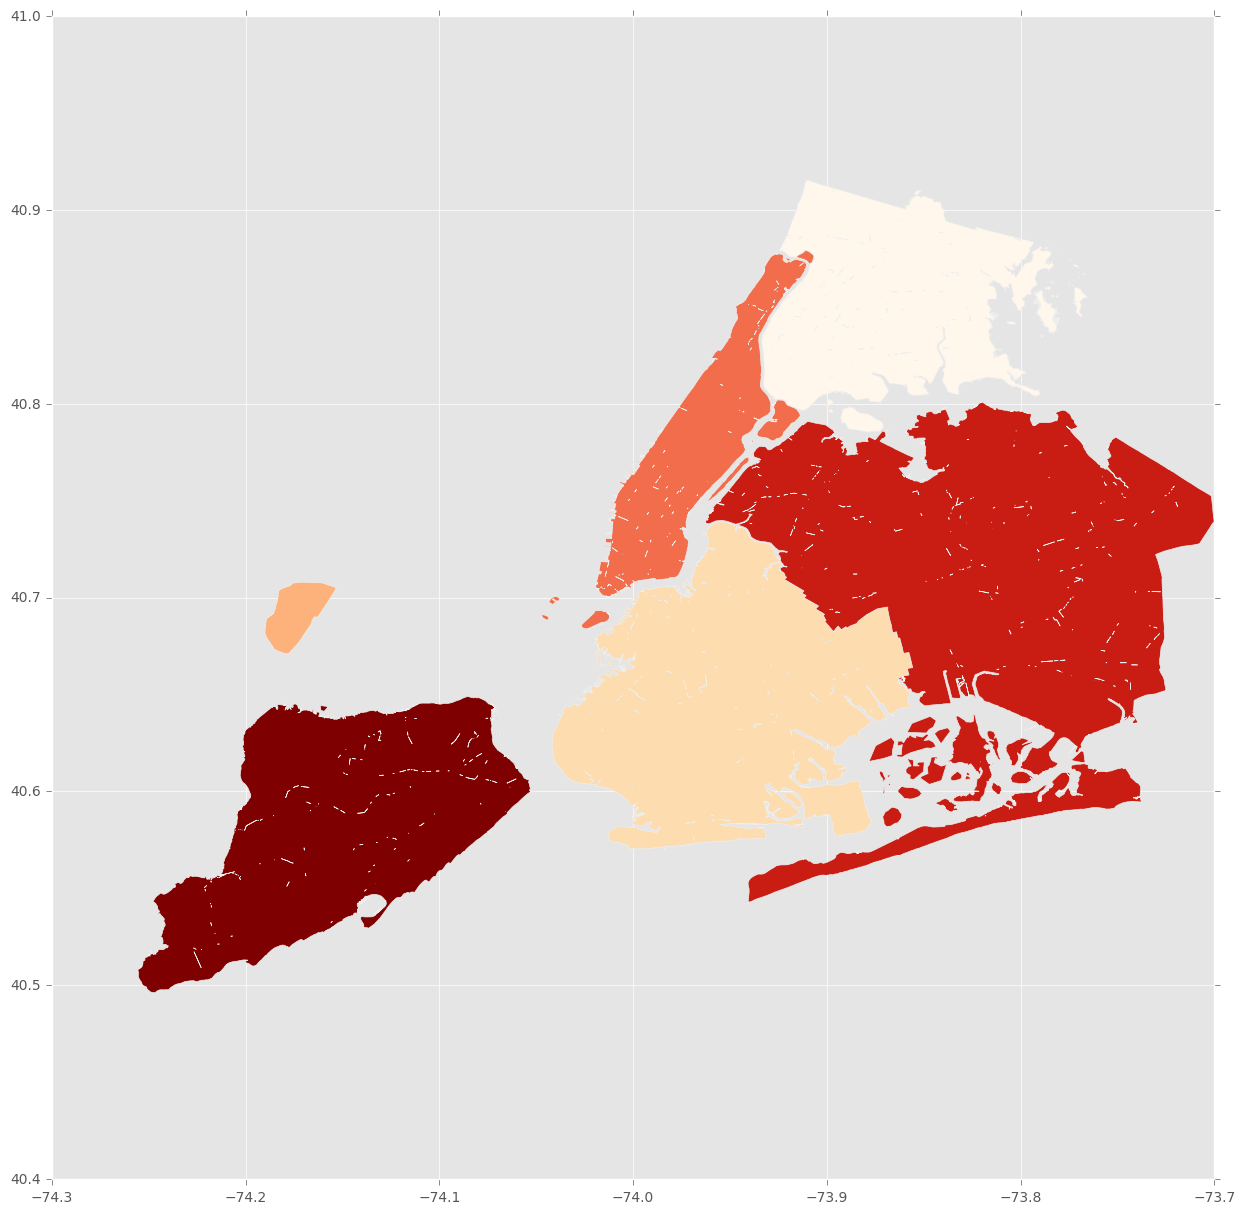

In [25]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
gdf.plot(figsize=(25, 15), cmap='OrRd')

In [ ]:
'{}, {}'.format(feature.get('zone'), feature.get('borough'))

In [ ]:
not len(RegionPartition.objects.filter(items__contains=[2253137]))

In [ ]:
from pgrouting.models import Ways
[w.gid for w in Ways.objects.filter(the_geom__intersects=geom)]

In [ ]:
ds = DataSource(shape_file_name)
lyr = ds[0]
feat = lyr[0]
print(type(feat.geom))
g = feat.geom.transform('3857', clone=True)
type(g.ewkt)

In [ ]:
str(lyr.fields)

In [ ]:
for i, feature in enumerate(lyr):
    print('{}, {}'.format(feature.get('zone'), feature.get('borough')))
    if i > 10:
        break